In [3]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime

#import sys
#sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
#from plotutils import *

#plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out'

In [4]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 12


In [5]:

compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        #'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true'])),
        'test_size': len(res['all_y_true'])
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

In [6]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'target', 'size']).agg(['mean', 'sem'])


In [7]:
compiled_res

,size,target,accuracy,f1_macro,f1_micro,kappa,num_epochs,lr,bins,test_size
0,5000,y_bin,0.94,0.939976,0.94,0.88,4,0.0003,2,50
1,1000,y_bin,0.90,0.899960,0.90,0.80,4,0.0003,2,50
2,500,y_bin,0.86,0.857201,0.86,0.72,4,0.0003,2,50
3,1000,y_bin,0.92,0.919872,0.92,0.84,4,0.0003,2,50
4,1000,y_bin,0.88,0.879808,0.88,0.76,4,0.0003,2,50
5,500,y_bin,0.92,0.919872,0.92,0.84,4,0.0003,2,50
6,100,y_bin,0.62,0.555867,0.62,0.24,4,0.0003,2,50
7,100,y_bin,0.50,0.333333,0.50,0.00,4,0.0003,2,50
8,100,y_bin,0.66,0.615559,0.66,0.32,4,0.0003,2,50
9,500,y_bin,0.86,0.859944,0.86,0.72,4,0.0003,2,50


In [8]:
grouped_res


accuracy            f1_macro            f1_micro  \
                                 mean       sem      mean       sem      mean   
bins num_epochs target size                                                     
2    4          y_bin  100   0.593333  0.048074  0.501586  0.085873  0.593333   
                       500   0.880000  0.020000  0.879006  0.020448  0.880000   
                       1000  0.900000  0.011547  0.899880  0.011566  0.900000   
                       5000  0.926667  0.035277  0.926487  0.035433  0.926667   

                                          kappa                lr       \
                                  sem      mean       sem    mean  sem   
bins num_epochs target size                                              
2    4          y_bin  100   0.048074  0.186667  0.096148  0.0003  0.0   
                       500   0.020000  0.760000  0.040000  0.0003  0.0   
                       1000  0.011547  0.800000  0.023094  0.0003  0.0   
                       5000  0.035277  0.853333  0.070553  0.0003  0.0   

                            test_size       
                                 mean  sem  
bins num_epochs target size                 
2    4          y_bin  100       50.0  0.0  
                       500       50.0  0.0  
                       1000      50.0  0.0  
                       5000      50.0  0.0

# Plot

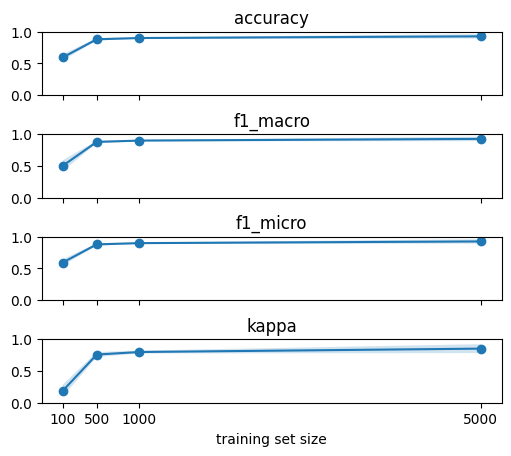

In [9]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'y_bin'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH),constrained_layout = True , sharex=True)
 
for num_epochs in [4]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        #ax[i].set_title(metric)
        ax[i].set_xticks((list(compiled_res['size'].unique())))
        ax[i].set_title(metric)
    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
now = datetime.now().strftime('%Y%m%d_%H%M') 
#fig.suptitle('Hydrides - {} - {}'.format(REPRESENTATION, 'binary'), fontsize=16)
fig.savefig(f'{now}_AdhesiveFreeE-{REPRESENTATION}-binary-{BINS}bin-classification-results.pdf', bbox_inches='tight')